In [6]:
# Libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Loading the dataset


In [7]:
path = '../data/raw/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(path)
df.drop('id', axis=1, inplace=True)

# print(df.columns.values)

df['hypertension'].replace({0: 'No', 1: 'Yes'}, inplace=True)
df['heart_disease'].replace({0: 'No', 1: 'Yes'}, inplace=True)
df['stroke'].replace({0: 'No', 1: 'Yes'}, inplace=True)

df.head(10)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
5,Male,81.0,No,No,Yes,Private,Urban,186.21,29.0,formerly smoked,Yes
6,Male,74.0,Yes,Yes,Yes,Private,Rural,70.09,27.4,never smoked,Yes
7,Female,69.0,No,No,No,Private,Urban,94.39,22.8,never smoked,Yes
8,Female,59.0,No,No,Yes,Private,Rural,76.15,NaN,Unknown,Yes
9,Female,78.0,No,No,Yes,Private,Urban,58.57,24.2,Unknown,Yes


## Exploration, Visualization & data cleaning
#### Descriptive statistics

In [8]:

print('\nCategorical Statistics:')
print(df.describe(include=['O'],))

print('\nNumerical Statistics:')
print(df.describe(percentiles=[.01, .25, .5, .75, .90, .95, .99]))

cat_columns = df.select_dtypes(include='O').columns
for col in cat_columns:
    print("\n",df[col].value_counts())




Categorical Statistics:
        gender hypertension heart_disease ever_married work_type  \
count     5110         5110          5110         5110      5110   
unique       3            2             2            2         5   
top     Female           No            No          Yes   Private   
freq      2994         4612          4834         3353      2925   

       Residence_type smoking_status stroke  
count            5110           5110   5110  
unique              2              4      2  
top             Urban   never smoked     No  
freq             2596           1892   4861  

Numerical Statistics:
               age  avg_glucose_level          bmi
count  5110.000000        5110.000000  4909.000000
mean     43.226614         106.147677    28.893237
std      22.612647          45.283560     7.854067
min       0.080000          55.120000    10.300000
1%        1.080000          56.330900    15.100000
25%      25.000000          77.245000    23.500000
50%      45.000000      

#### Imputes missing values

In [9]:
def impute (df, column, strategy):
    from sklearn.impute import SimpleImputer
    imp = SimpleImputer(missing_values=np.nan, strategy=strategy)
    df[column] = imp.fit_transform(df[column].values.reshape(-1,1))
    return df


## Checking for Missing Values
print('Number of missing values in each column:')
print(df.isnull().sum())

df = impute(df, 'bmi', 'mean')

df.head(10)

Number of missing values in each column:
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.600000,formerly smoked,Yes
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.893237,never smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.500000,never smoked,Yes
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.400000,smokes,Yes
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.000000,never smoked,Yes
5,Male,81.0,No,No,Yes,Private,Urban,186.21,29.000000,formerly smoked,Yes
6,Male,74.0,Yes,Yes,Yes,Private,Rural,70.09,27.400000,never smoked,Yes
7,Female,69.0,No,No,No,Private,Urban,94.39,22.800000,never smoked,Yes
8,Female,59.0,No,No,Yes,Private,Rural,76.15,28.893237,Unknown,Yes
9,Female,78.0,No,No,Yes,Private,Urban,58.57,24.200000,Unknown,Yes


#### Visualization: numerical values
**Correlation Analysis**

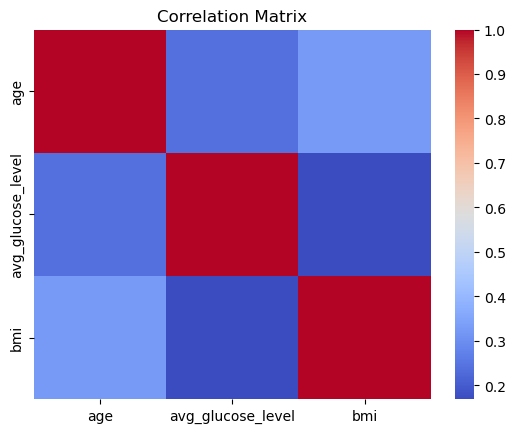

In [10]:
# Calculate correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Visualize correlation matrix using a heatmap
fig = plt.figure()
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()
fig.savefig("../data/data_visualization/%s.png" % 'correlation_Matrix', bbox_inches='tight')

**Histograms and Density Plots**

/home/savez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/savez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


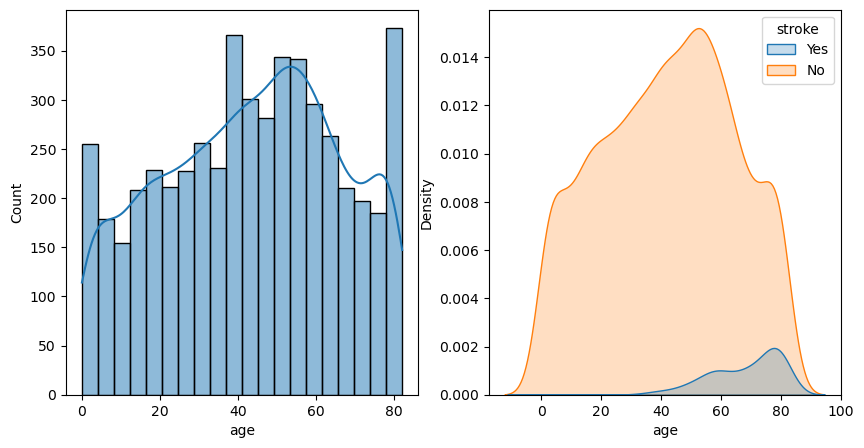

/home/savez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/savez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


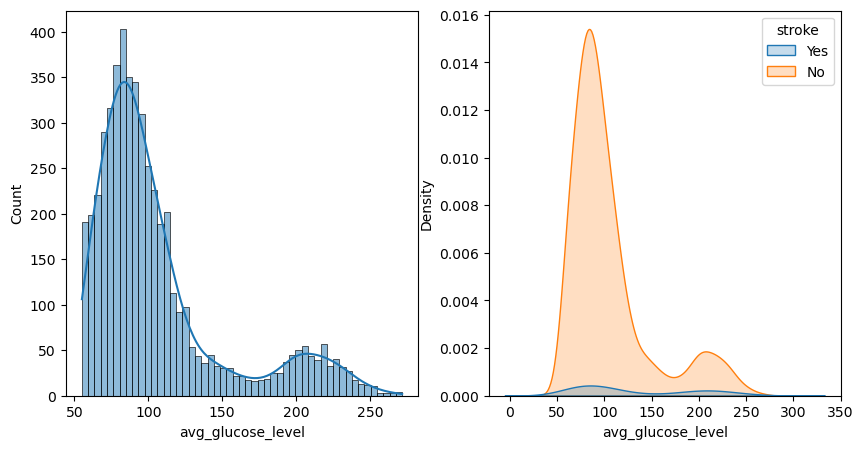

/home/savez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/savez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


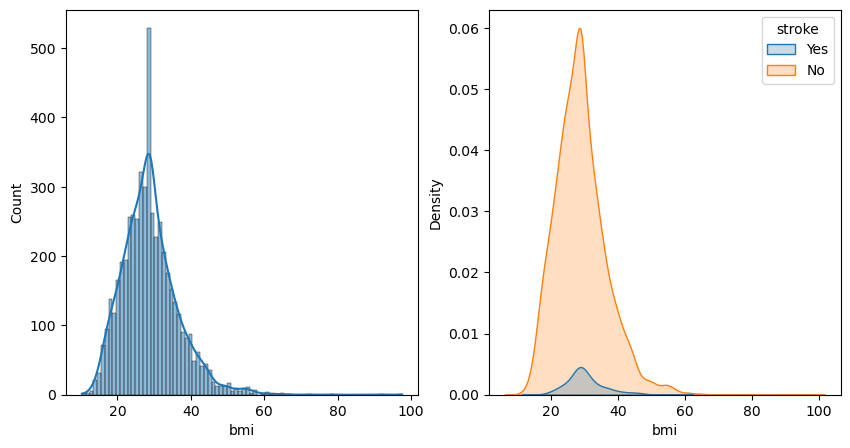

In [11]:
# Create histograms for each variable
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    fig,axis = plt.subplots(1,2,figsize=(10,5))
    sns.histplot(df[col], kde=True,ax=axis[0])
    sns.kdeplot(data=df,x=col, hue='stroke',fill=True,ax=axis[1])
    plt.show()
    label = 'hist_kde_plot_' + col
    fig.savefig("../data/data_visualization/%s.png" % label, bbox_inches='tight')




**Boxplots and Violin Plots**

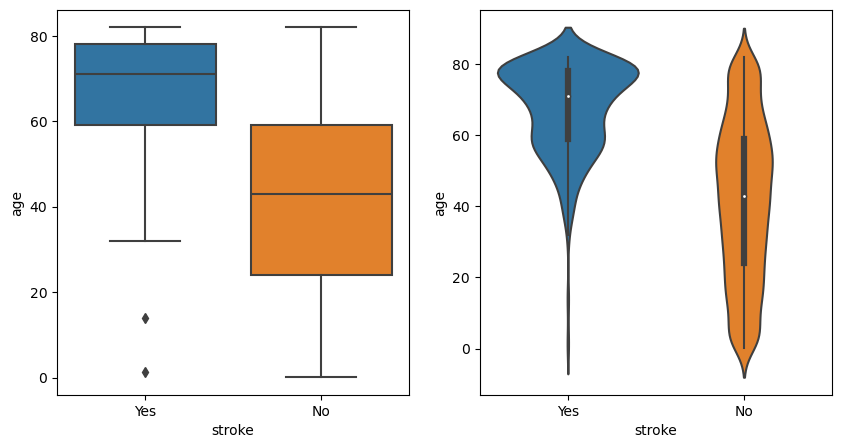

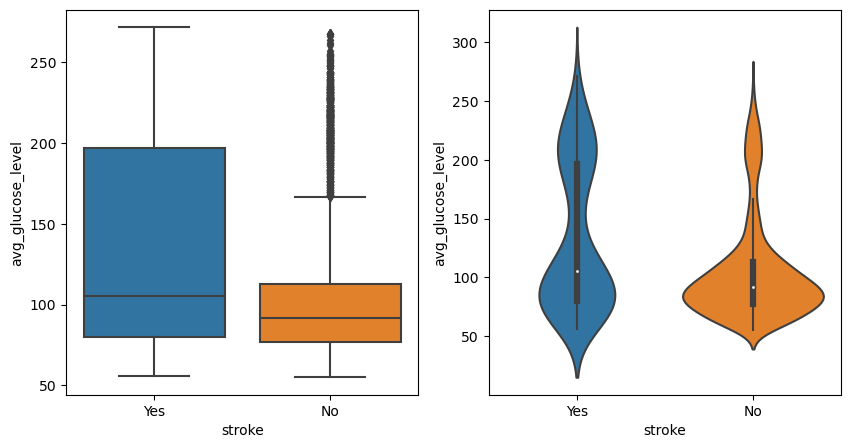

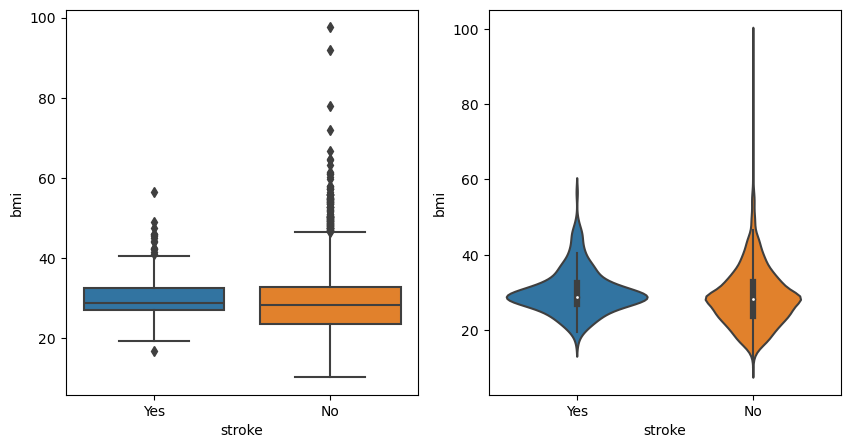

In [12]:
for col in num_cols:
    fig,axis = plt.subplots(1,2,figsize=(10,5))
    sns.boxplot(x='stroke',y=df[col],data=df,ax=axis[0])
    sns.violinplot(x='stroke',y=df[col],data=df,ax=axis[1])
    plt.show()
    label = 'box_violin' + col
    fig.savefig("../data/data_visualization/%s.png" % label, bbox_inches='tight')

**Pairwise Scatterplots**

/home/savez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/savez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/savez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

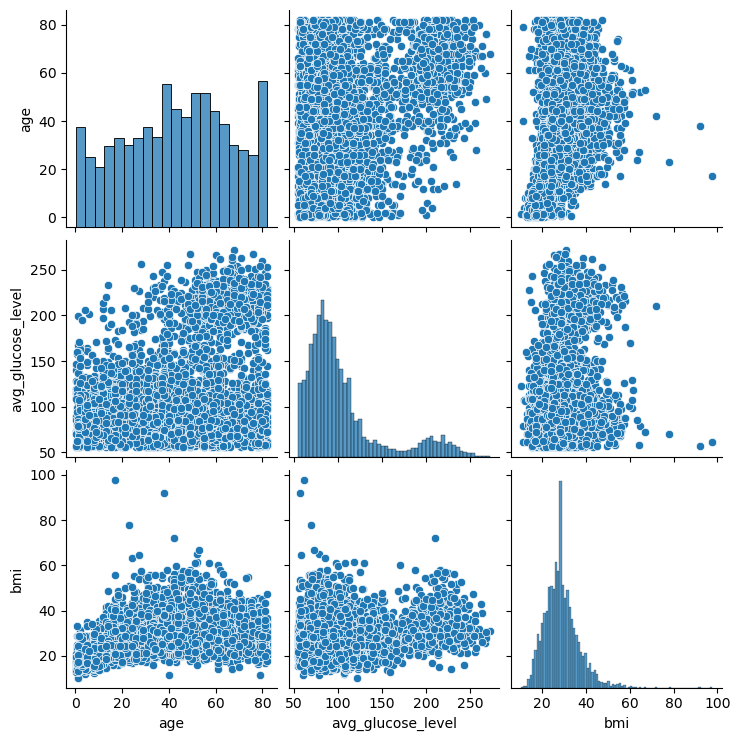

In [13]:
# Create a pairplot to visualize the relationships between the variables
fig = plt.figure()
sns.pairplot(df)
plt.show()
fig.savefig("../data/data_visualization/%s.png" % 'pairplot', bbox_inches='tight')

#### Visualization: categorical values
**Pie plots**

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1


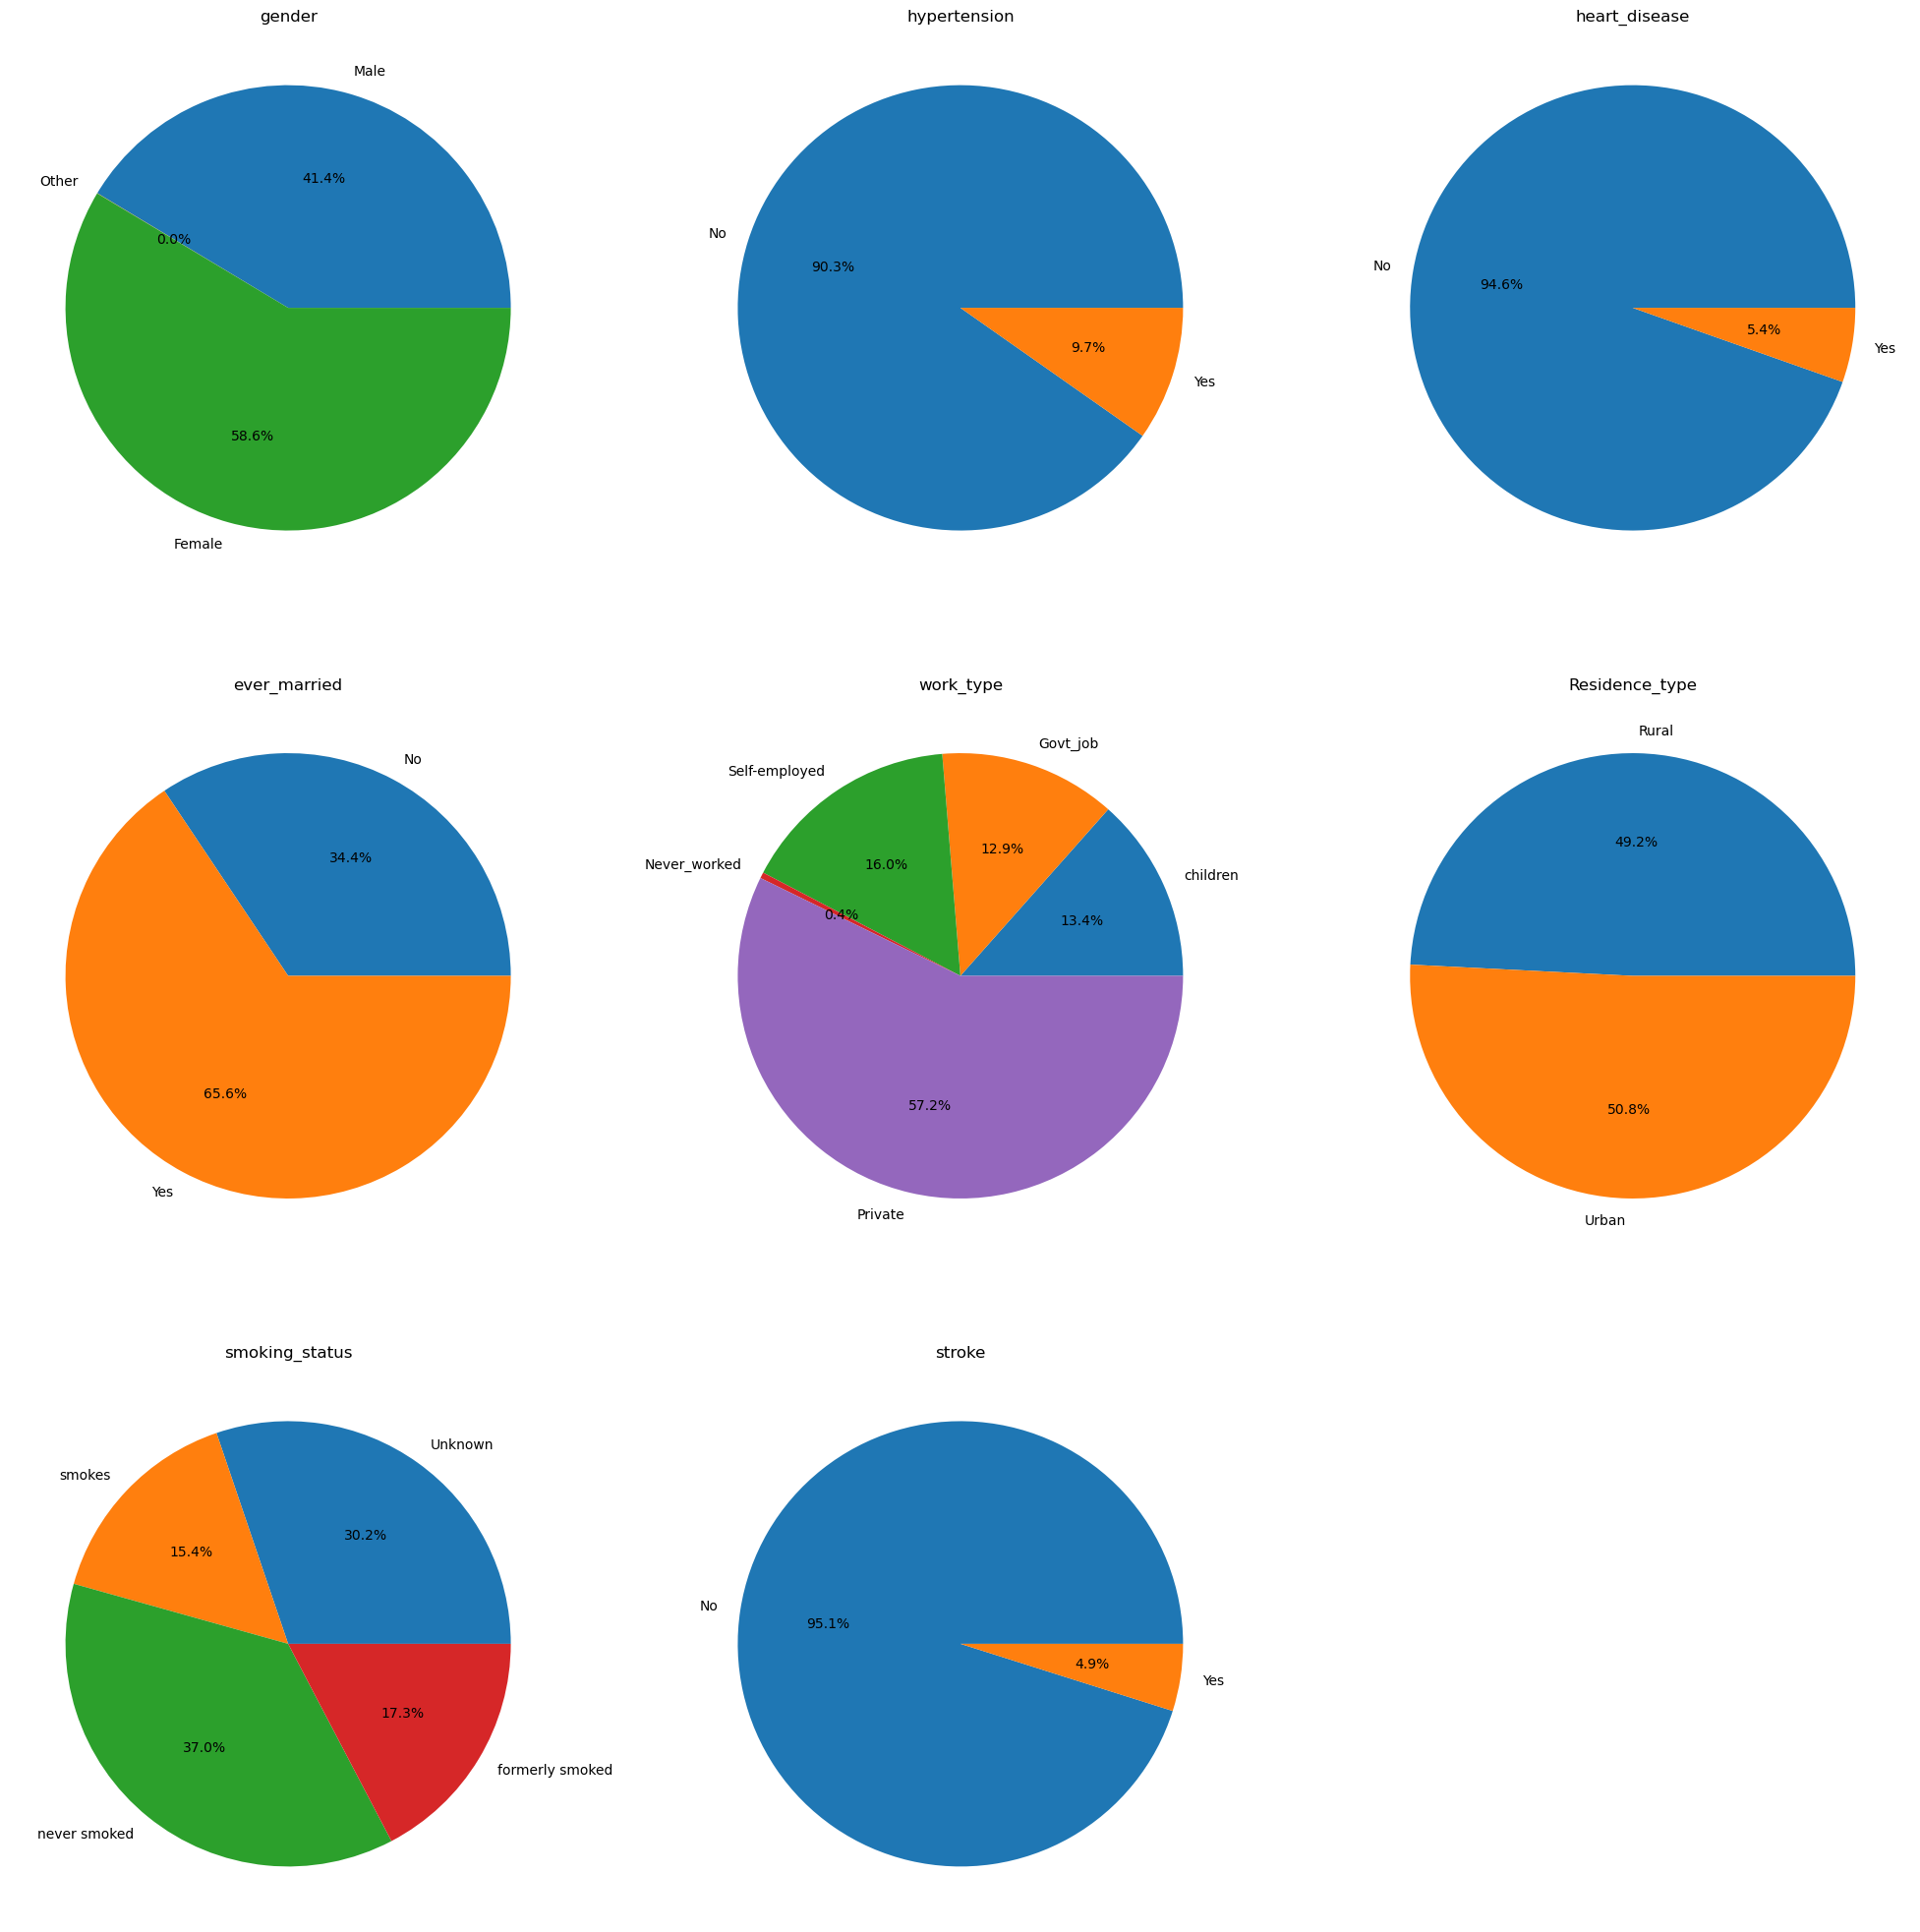

In [14]:

i,j = 0,0
fig,axes = plt.subplots(3,3,figsize=(25,25))
for i,col in enumerate(cat_columns):
   
   if i % 3 == 0 and i != 0:
      j += 1
      i = 0
   labels = set(df[col].values)
   data = []
   for item in labels:
      data.append(df[col].value_counts()[item])
   print(j,i%3)
   axes[j,i%3].pie(data,labels=labels,autopct='%1.1f%%')
   axes[j,i%3].set_title(col)
   
fig.delaxes(axes[2,2])
plt.show()
fig.savefig("../data/data_visualization/%s.png" % 'pieplot', bbox_inches='tight')


**Count plots**

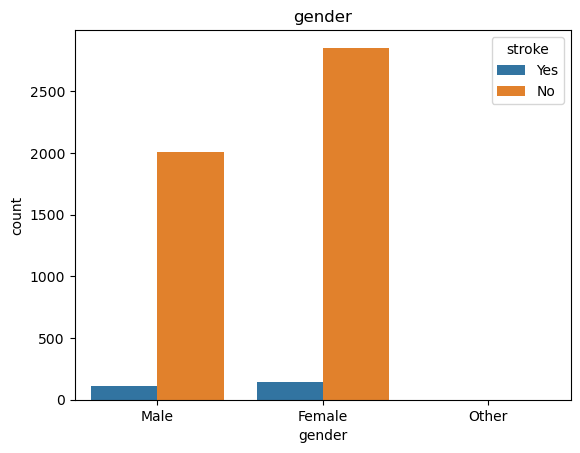

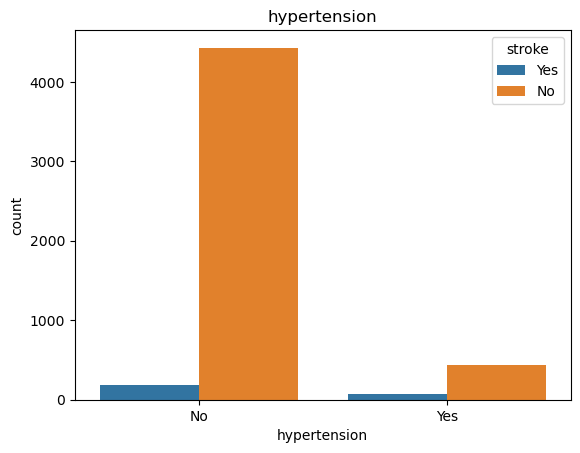

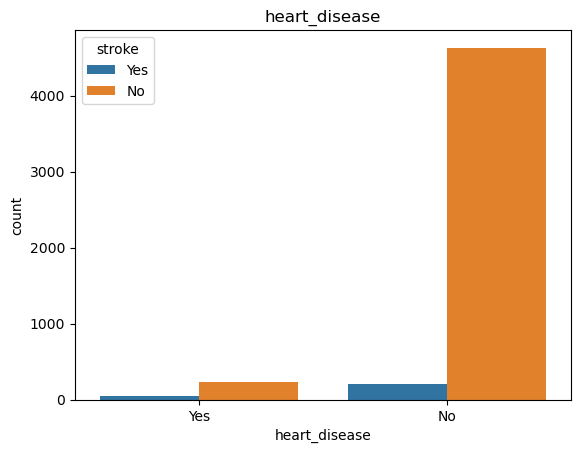

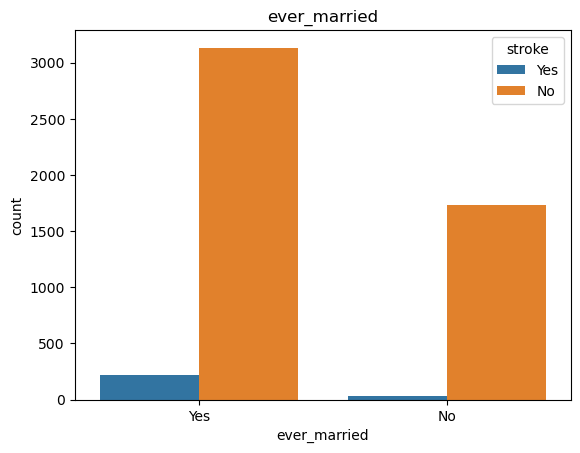

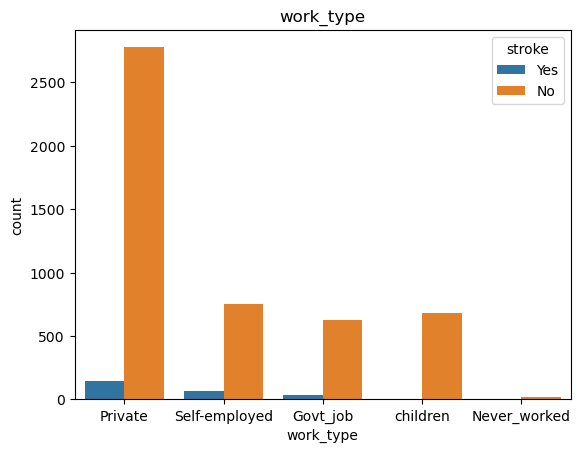

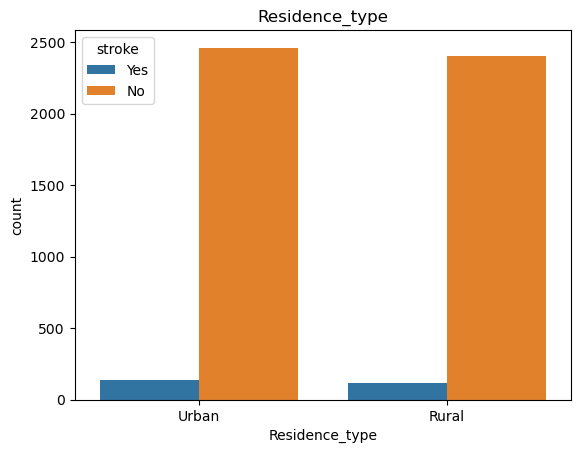

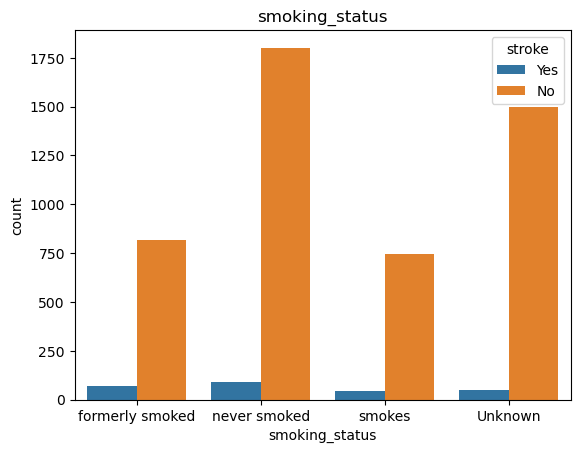

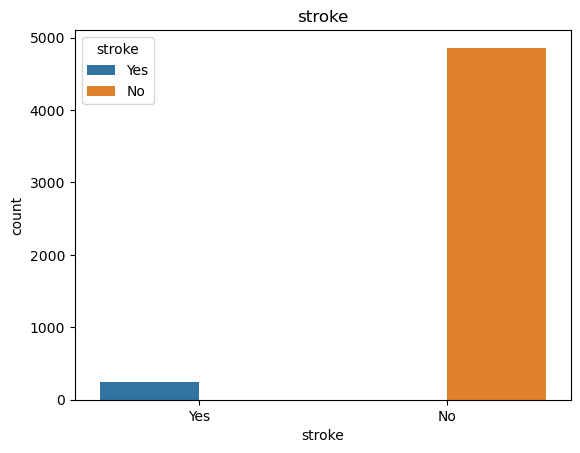

In [15]:
for col in cat_columns:
    fig = plt.figure()
    sns.countplot(x=col,data=df,hue='stroke')
    plt.title(col)
    plt.show()
    label = 'count_plot_' + col
    fig.savefig("../data/data_visualization/%s.png" % label, bbox_inches='tight')


## Data Preprocessing and Feature Engineering
#### Removing outliers